In [1]:
from model import *
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print(i, flush=True)

9


In [12]:
model = RegionModel(
    international_trade = True
    ,efficiency_stdev = 2
    ,eu_tax = 0.2
    ,neighbor_influence = 0.05
    ,tax_influence = 0.1
    ,member_trade_multiplier = 1.3
    ,benefit_distribution = 1.1
)

# for _ in range(100):
#     clear_output(wait=True)
#     model.step()
#     print(model.member_count, model.other_count)
    

In [13]:
model.average_cooperativeness

0

In [17]:
for _ in range(100): model.step()
model.compute_statistics()
model.datacollector.collect(model)

In [18]:
np.std([agent.wealth for agent in model.agents])

2642.0399010931274

In [19]:
df = model.datacollector.get_model_vars_dataframe()
df

,member_count,other_count,average_cooperativeness,other_wealth,total_wealth,member_wealth,other_eff,total_eff,member_eff,gini_coefficient,stdev_agent_cooperativeness
0,2,318,-0.98750,2257.631524,2297.520543,8639.874514,1.980987,2.012259,6.984574,0.595620,0.157619
1,1,319,-0.99375,5010.810561,5047.081020,16617.357314,1.996304,2.012259,7.101729,0.554104,0.111629


In [9]:
%timeit for _ in range(1): model.step()

11.5 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
(0.012 * 1000 * 7**6)/(60*60*24)

32.680277777777775

In [14]:
7**2

49

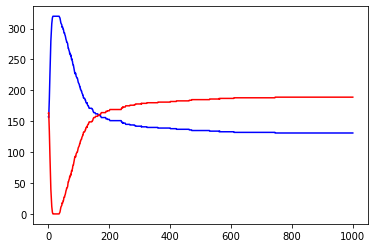

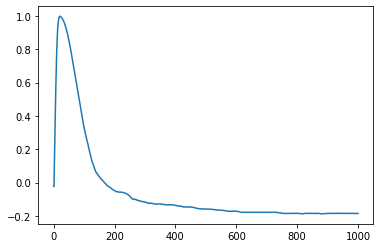

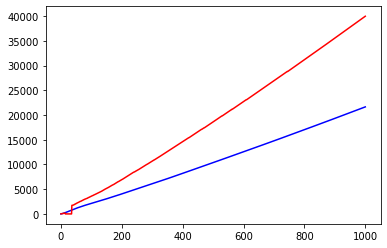

In [10]:
df = model.datacollector.get_model_vars_dataframe()
df2 = model.datacollector.get_agent_vars_dataframe()
plt.plot(df["member_count"], color="blue")
plt.plot(df["other_count"], color="red")
plt.show()

plt.plot(df["average_cooperativeness"])
plt.show()

plt.plot(df["member_wealth"], color="blue")
plt.plot(df["other_wealth"], color="red")
plt.show()

(array([60., 62., 59., 45., 39., 25., 20.,  6.,  2.,  2.]),
 array([3.99450726e-03, 4.08135986e-01, 8.12277464e-01, 1.21641894e+00,
        1.62056042e+00, 2.02470190e+00, 2.42884338e+00, 2.83298486e+00,
        3.23712633e+00, 3.64126781e+00, 4.04540929e+00]),
 <BarContainer object of 10 artists>)

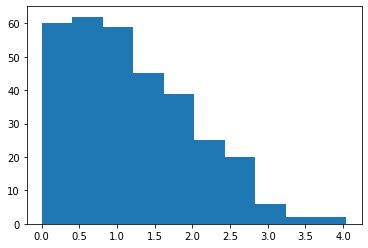

In [3]:
a1 = model.agents[0]
a2 = model.agents[1]

In [10]:
# model.step()
# for agents in model.agents:
#     # agents.step()
#     # agents.choose_strategy()
#     # agents.update_wealth
#     neighbor = agents.get_neighbor()
#     # agents.interact(neighbor)
#     agents.CC(neighbor)
#     # self.update_cooperativeness(neighbor)

In [8]:
a1.model.basic_trade_reward

0.2

In [13]:
model.calculate_benefit()

ZeroDivisionError: division by zero

In [24]:
a2.cooperativeness

0.307982750577805

In [25]:
# a1.CC(a2)
a1.DD(a2)

0
0
-0.20736
-0.20736


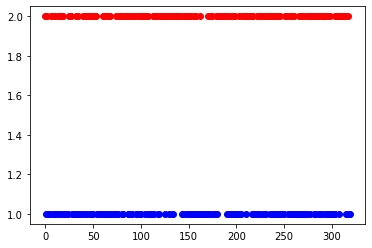

In [26]:
plt.scatter([a.unique_id for a in model.agents if a.strategy == 2], [a.strategy for a in model.agents if a.strategy == 2], color="red")
plt.scatter([a.unique_id for a in model.agents if a.strategy == 1], [a.strategy for a in model.agents if a.strategy == 1], color="blue")


In [60]:
model.step()
model.datacollector.get_model_vars_dataframe()

,collaborator_count,defector_count,av_coop,other_wealth,total_wealth,member_wealth
0,156,164,NaN,0,0,0
1,156,164,-0.015935,164,320,156
2,156,164,-0.015935,328,640,312
3,156,164,-0.015935,492,960,468
4,156,164,-0.015935,656,1280,624
5,156,164,-0.015935,820,1600,780
6,156,164,-0.015935,984,1920,936
7,156,164,-0.015935,1148,2240,1092
8,156,164,-0.015935,1312,2560,1248
9,156,164,-0.015935,1476,2880,1404
